In [42]:
from bs4 import BeautifulSoup
import requests

In [43]:
wiki_page = "https://bleach.fandom.com"

In [44]:
def getPageSoup(page):
    r       = requests.get(page.replace("\n", ""))
    soup    = BeautifulSoup(r.content, "html.parser")
    return soup

In [45]:
def getEpSoup(ep_name):
    bleach_wiki             = wiki_page
    bleach_wiki_ep_endpoint = bleach_wiki + ep_name
    return getPageSoup(bleach_wiki_ep_endpoint)

In [46]:
def recoverSummaryFromSoup(ep_summary_soup, allowed_tags=None):
    ep_summary = ""
    for element in ep_summary_soup:
        ep_summary += element.getText()
    return ep_summary

In [47]:
def process_text(element, tag_count):
    return element

def process_p(element, tag_count):
    text = ""
    for child in element.children:
        text += process_element(child, tag_count)
    return text

def process_a(element, tag_count):
    text = ""
    for child in element.children:
        text += process_element(child, tag_count)
    return text

def process_sup(element, tag_count):
    return ""

def process_br(element, tag_count):
    return ""

def process_i(element, tag_count):
    text = ""
    for child in element.children:
        text += process_element(child, tag_count)
    return text

def process_b(element, tag_count):
    text = ""
    for child in element.children:
        text += process_element(child, tag_count)
    return text

def process_figure(element, tag_count):
    return ""

def default_process(element, tag_count):
    return str(element)

In [48]:
tag_processors = {
    None     : process_text,
    "p"      : process_p,
    "a"      : process_a,
    "sup"    : process_sup,
    "br"     : process_br,
    "i"      : process_i,
    "figure" : process_figure,
    "b"      : process_b
}

def update_tag_count(tag_name, tag_count):
    if(tag_name in tag_count):
        tag_count[tag_name] += 1
    else:
        tag_count[tag_name] = 1

def process_element(element, tag_count):
    
    update_tag_count(element.name, tag_count)

    if(element.name in tag_processors):
        return tag_processors[element.name](element, tag_count)
    return default_process(element, tag_count)

In [49]:
def getEpSummary(ep_name, soup_tag_count=dict()):
    ep_soup                 = getEpSoup(ep_name)
    ep_summary_title_soup   = ep_soup.select("#Summary").pop().parent
    ep_summary_soup_elem    = ep_summary_title_soup.find_next_sibling()
    ep_summary = ""
    while(ep_summary_soup_elem.name != 'h2'):
        ep_summary += process_element(ep_summary_soup_elem, soup_tag_count)
        ep_summary_soup_elem = ep_summary_soup_elem.find_next_sibling()
    try:
        next_ep_page = next(ep_soup.select("table").pop().select("th").pop().children)["href"]
    except:
        next_ep_page = ""
    return (ep_summary, soup_tag_count, next_ep_page)

In [50]:
def getEpsSummary(start_ep_name, number_of_eps):
    soup_tag_count = dict()
    eps_summary = []
    for ep_number in range(0, number_of_eps):
        ep_summary, _, next_ep_page = getEpSummary(start_ep_name, soup_tag_count)
        start_ep_name = next_ep_page
        eps_summary.append(ep_summary)
        #print(ep_number+1)
    return eps_summary, soup_tag_count

In [51]:
ep_summary, soup_tag_count, next_ep_page = getEpSummary("/wiki/The_Day_I_Became_a_Shinigami")
print(ep_summary)
print(soup_tag_count)
print(next_ep_page)

In a barren location filled with white sand and craggy spires of blue rock, the shadows grow long over the desert, and two blobs of darkness rise from the shade into the air before bursting out of the clouds in the nighttime sky over Karakura Town. The two blobs reveal themselves to be invisible monsters that land on a riverbank running beneath a bridge below.
Elsewhere, a Jigokuchō flies toward a full moon while Rukia Kuchiki stands on top of a telephone poll nearby. Noting she senses a powerful Reiatsu, Rukia jumps to another telephone pole before leaping toward the town below. The following evening, at twilight, Ichigo Kurosaki stands in front of five skateboarding teenagers, one of whom is lying on the ground, while a belligerent Toshi-Bro confronts him over kicking down Yama-Bro, who lies unconscious nearby, and telling them to get out of his way. When Ichigo does not respond, Toshi-Bro demands he say something and angrily moves to punch him in the face.
However, Ichigo nonchalant

In [52]:
eps_summary, soup_tag_count = getEpsSummary("/wiki/The_Day_I_Became_a_Shinigami", 366)
print(soup_tag_count)

{'figure': 6568, 'p': 7042, None: 41690, 'a': 12715, 'b': 6197, 'i': 559, 'br': 168}


In [53]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x7facb015a770>,
 [Text(0, 0, 'figure'),
  Text(1, 0, 'p'),
  Text(2, 0, ''),
  Text(3, 0, 'a'),
  Text(4, 0, 'b'),
  Text(5, 0, 'i'),
  Text(6, 0, 'br')])

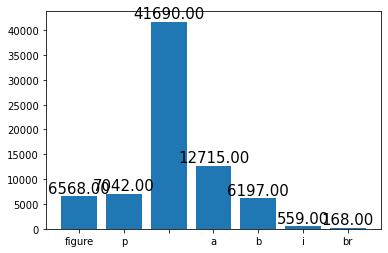

In [54]:
plots = plt.bar(range(len(soup_tag_count)), list(soup_tag_count.values()), data=list(soup_tag_count.values()), align='center')

for bar in plots.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(range(len(soup_tag_count)), list(soup_tag_count.keys()))

(0.0, 50000.0)

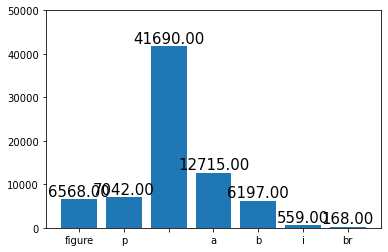

In [55]:
plots = plt.bar(range(len(soup_tag_count)), list(soup_tag_count.values()), data=list(soup_tag_count.values()), align='center')

for bar in plots.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(range(len(soup_tag_count)), list(soup_tag_count.keys()))
plt.ylim((0, 50000))

In [56]:
import json

json_object = json.dumps(eps_summary)

with open("1_scrapping_bleach.json", "w") as outfile:
    outfile.write(json_object)